In [28]:
import numpy as np
import matplotlib.pyplot as plt
from univariate import *

In [29]:
x,y = load_data()
x_norm = z_score_normalized_features(x)
# y_norm = z_score_normalized_features(y)

initial_w = 0.
initial_b = 0.

w,b,w_history,cost_history = calculate_gradient_descent(x_norm,y,initial_w,initial_b,alpha=0.01,iterations=1000)
print(f"Calculated w : {w} , b : {b}")

predicted_y = compute_model_output(x_norm,w,b)
# predicted_y = z_score_denormalized_features(y,predicted_y)
print(y)


Iterations : 0 Cost : 3.19e+09
Iterations : 100 Cost : 4.41e+08
Iterations : 200 Cost : 7.26e+07
Iterations : 300 Cost : 2.33e+07
Iterations : 400 Cost : 1.67e+07
Iterations : 500 Cost : 1.58e+07
Iterations : 600 Cost : 1.57e+07
Iterations : 700 Cost : 1.56e+07
Iterations : 800 Cost : 1.56e+07
Iterations : 900 Cost : 1.56e+07
Iterations : 1000 Cost : 1.56e+07
Calculated w : 26366.04413938564 , b : 75999.7188556831
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


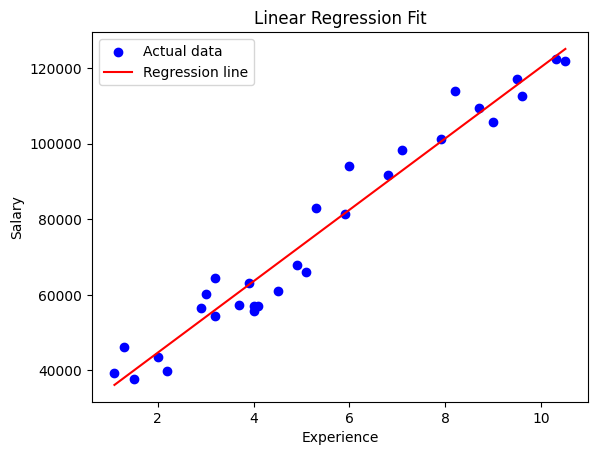

In [30]:
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, predicted_y, color='red', label='Regression line')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

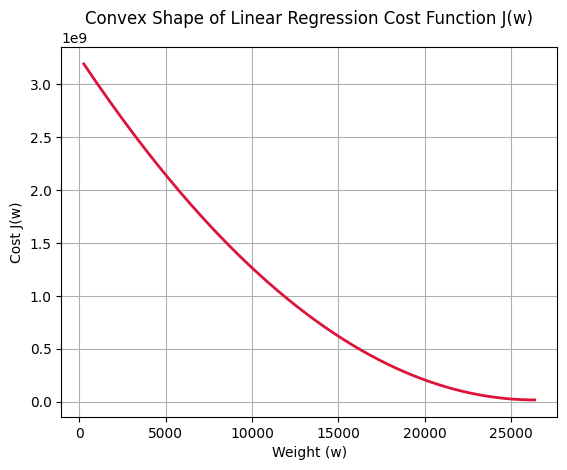

In [31]:
# plt.figure(figsize=(8,5))
plt.plot(w_history, cost_history, color='crimson', linewidth=2)
plt.title("Convex Shape of Linear Regression Cost Function J(w)")
plt.xlabel("Weight (w)")
plt.ylabel("Cost J(w)")
plt.grid(True)
plt.show()

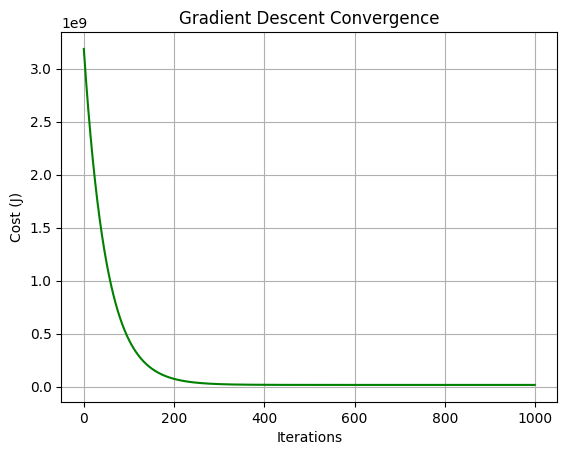

In [32]:
plt.plot(range(len(cost_history)), cost_history, color='green')
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()


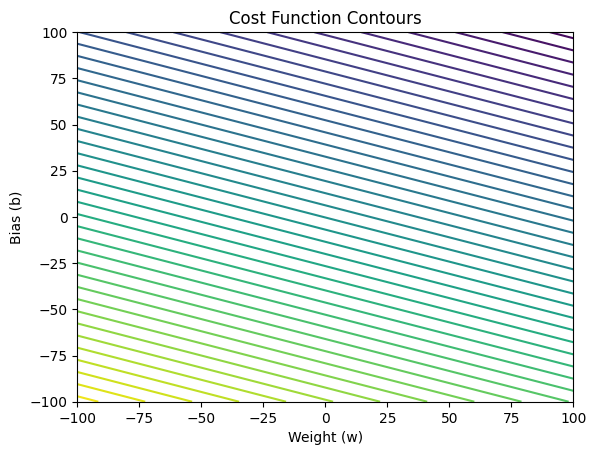

In [33]:
w_values = np.linspace(-100, 100, 100)
b_values = np.linspace(-100, 100, 100)
J_vals = np.zeros((len(w_values), len(b_values)))

for i in range(len(w_values)):
    for j in range(len(b_values)):
        J_vals[i, j] = calculate_cost(x_norm, y, w_values[i], b_values[j])

W, B = np.meshgrid(w_values, b_values)
plt.contour(W, B, J_vals.T, levels=50, cmap='viridis')
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Cost Function Contours')
plt.show()



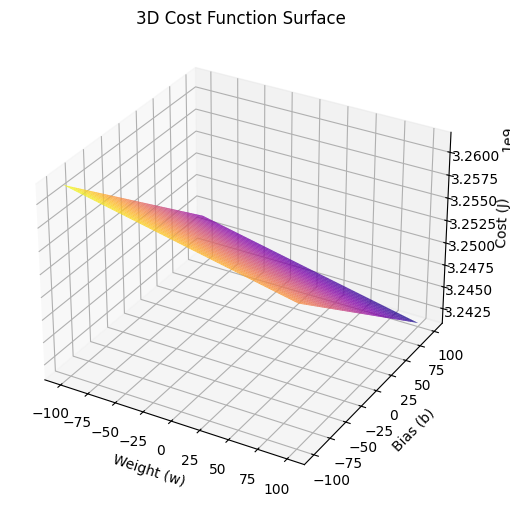

In [34]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals.T, cmap='plasma')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Cost (J)')
ax.set_title('3D Cost Function Surface')
plt.show()


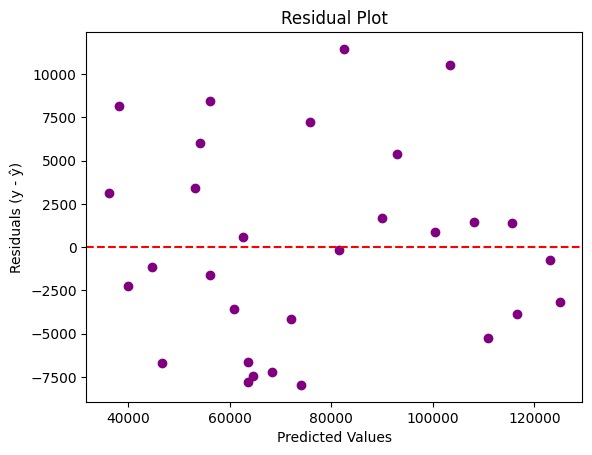

In [35]:
residuals = y - predict(x_norm, w, b)
plt.scatter(predict(x_norm, w, b), residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y - ŷ)")
plt.title("Residual Plot")
plt.show()


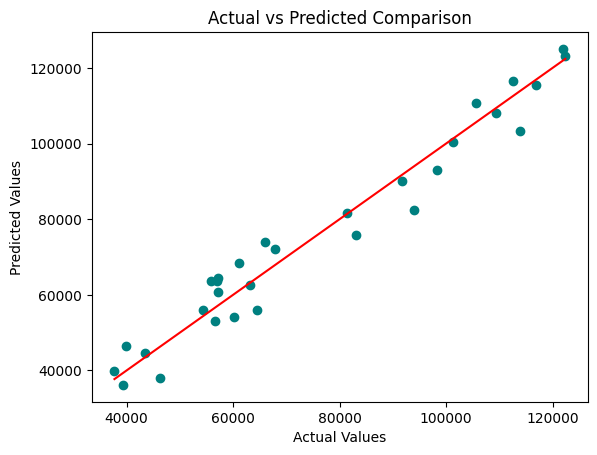

In [36]:
y_pred = predict(x_norm, w, b)
plt.scatter(y, y_pred, color='teal')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # perfect line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Comparison")
plt.show()

